In [46]:
using PyPlot

In [47]:
# from http://www.mymathlib.com/diffeq/runge-kutta/runge_kutta_v2_3.html
function rk3(func, x0, dt, n)
    X = Array(typeof(x0), n)
    T = Array(typeof(dt), n)
    X[1] = x0
    T[1] = 0.0
    for i = 2:n
        T[i] = T[i-1] + dt
        k1 = func(X[i-1], T[i-1])
        k2 = func(X[i-1] + dt/3.0*k1, T[i-1] + dt/3.0)
        k3 = func(X[i-1] + 2*dt/3.0*k2, T[i-1] + 2.0*dt/3.0)
        X[i] = X[i-1] + 0.25*dt*(k1 + 3*k3)
    end
    return T, X
end

rk3 (generic function with 1 method)

In [48]:
function func(x,t)
    return [x[2], -x[1]]
end

func (generic function with 1 method)

In [49]:
function rk3_other_way(func, x0, dt, n)
    X_2 = Array(Float64, (length(x0), n))
    X_3 = Array(Float64, (length(x0), n))
    T = linspace(0, (n-1)*dt, n)
    X_2[:,1] = x0
    X_3[:,1] = x0
    for i = 2:n
        k1 = func(X_2[:,i-1], T[i-1])
        k2 = func(X_2[:,i-1] + 0.5*dt*k1,T[i-1] + 0.5*dt)
        k3 = func(X_2[:,i-1] + 0.75*dt*k2, T[i-1] + 0.75*dt)
        k4 = func(X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0,T[i])
        X_3[:,i] = X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0
        X_2[:,i] = X_2[:,i-1] + dt*(7*k1 + 6*k2 + 8*k3 + 3*k4)/24.0
    end
    return T, X_2, X_3
end

rk3_other_way (generic function with 1 method)

In [50]:
function rk3_other_way(func, x0, starting_stepsize, ending)
    X = Array(Float64, (length(x0), 1))
    T = [0.0]
    X[:,1] = x0
    dt = starting_stepsize
    while T[end] < ending_time
        while true
            k1 = func(X_2[:,i-1], T[end])
            k2 = func(X_2[:,i-1] + 0.5*dt*k1,T[end] + 0.5*dt)
            k3 = func(X_2[:,i-1] + 0.75*dt*k2, T[end] + 0.75*dt)
            k4 = func(X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0,T[end] + dt)
            dx_3 = dt*(2*k1 + 3*k2 + 4*k3)/9.0
            dx_2 = dt*(7*k1 + 6*k2 + 8*k3 + 3*k4)/24.0
            
            if norm(dx_3 - dx_2) > tol
                if dt > min_step_size
                    dt *= 0.5
                else
                    break
                end
            else
                break
            end
        end
        
        push!(T, T[end] + dt)
        push!(X)
        
    for i = 2:n
        k1 = func(X_2[:,i-1], T[i-1])
        k2 = func(X_2[:,i-1] + 0.5*dt*k1,T[i-1] + 0.5*dt)
        k3 = func(X_2[:,i-1] + 0.75*dt*k2, T[i-1] + 0.75*dt)
        k4 = func(X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0,T[i])
        X_3[:,i] = X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0
        X_2[:,i] = X_2[:,i-1] + dt*(7*k1 + 6*k2 + 8*k3 + 3*k4)/24.0
    end
    return T, X_2, X_3
end

LoadError: syntax: incomplete: "function" at In[50]:1 requires end
while loading In[50], in expression starting on line 1

In [51]:
x0 = [1.0, 0.0]
dt = 1.0
tol = 1e-6

1.0e-6

In [52]:
X = Array(Float64, (length(x0), 1))
T = [0.0]
X[:,1] = x0

2-element Array{Float64,1}:
 1.0
 0.0

In [53]:
i = 2

2

In [54]:
dx_3 = [0.0, 0.0]
dx_2 = [1.0, 1.0]

2-element Array{Float64,1}:
 1.0
 1.0

In [55]:
while true
    k1 = func(X_2[:,i-1], T[i-1])
    k2 = func(X_2[:,i-1] + 0.5*dt*k1,T[i-1] + 0.5*dt)
    k3 = func(X_2[:,i-1] + 0.75*dt*k2, T[i-1] + 0.75*dt)
    k4 = func(X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0,T[i-1] + dt)
    dx_3 = dt*(2*k1 + 3*k2 + 4*k3)/9.0
    dx_2 = dt*(7*k1 + 6*k2 + 8*k3 + 3*k4)/24.0
    
    if norm(dx_3 - dx_2) > tol
        if dt > min_step_size
            dt *= 0.5
        else
            break
        end
    else
        break
    end
end

LoadError: min_step_size not defined
while loading In[55], in expression starting on line 1

In [56]:
dx_2

2-element Array{Float64,1}:
 -0.479167
 -0.8125  

In [57]:
dx_3

2-element Array{Float64,1}:
 -0.5     
 -0.833333

In [58]:
while true
    k1 = func(X_2[:,i-1], T[i-1])
    k2 = func(X_2[:,i-1] + 0.5*dt*k1,T[i-1] + 0.5*dt)
    k3 = func(X_2[:,i-1] + 0.75*dt*k2, T[i-1] + 0.75*dt)
    k4 = func(X_2[:,i-1] + dt*(2*k1 + 3*k2 + 4*k3)/9.0,T[i])
    dx_3 = dt*(2*k1 + 3*k2 + 4*k3)/9.0
    dx_2 = dt*(7*k1 + 6*k2 + 8*k3 + 3*k4)/24.0
end
    

LoadError: BoundsError()
while loading In[58], in expression starting on line 1

In [59]:
a = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [60]:
push!(a, 1.0)

4-element Array{Float64,1}:
 1.0
 2.0
 3.0
 1.0

In [61]:
T, X_2, X_3 = rk3_other_way(func, [1.0, 0.0], 0.01, 101)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0],
2x101 Array{Float64,2}:
 1.0   0.99995      0.9998      0.99955    …   0.557024   0.548692   0.540304
 0.0  -0.00999981  -0.0199986  -0.0299954     -0.830496  -0.836025  -0.84147 ,

2x101 Array{Float64,2}:
 1.0   0.99995      0.9998      0.99955    …   0.557024   0.548692   0.540304
 0.0  -0.00999983  -0.0199986  -0.0299955     -0.830496  -0.836025  -0.84147 )

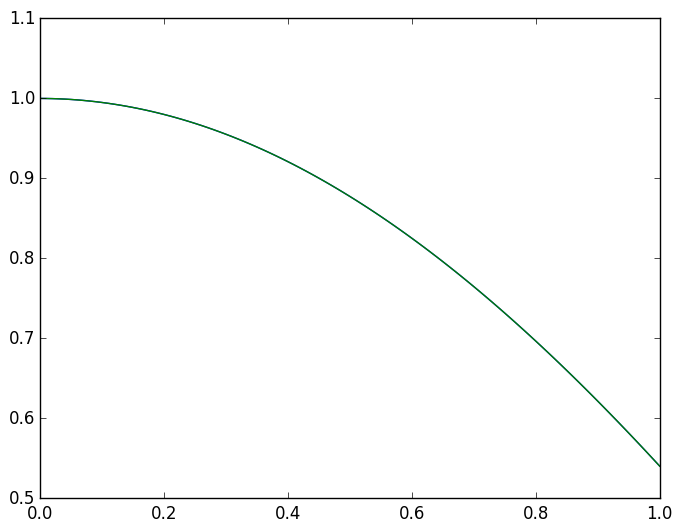

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f44ba843110>

In [62]:
plot(T, X_2[1,:][:])
plot(T, X_3[1,:][:])

In [63]:
function rk4(func, x0, dt, n)
    X = Array(typeof(x0), n)
    T = Array(typeof(dt), n)
    X[1] = x0
    T[1] = 0.0
    for i = 2:n
        T[i] = T[i-1] + dt
        k1 = func(X[i-1], T[i-1])
        k2 = func(X[i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt)
        k3 = func(X[i-1] + 0.5*dt*k2, T[i-1] + 0.5*dt)
        k4 = func(X[i-1] + dt*k3, T[i-1] + dt)
        X[i] = X[i-1] + dt*(k1/6.0 + k2/3.0 + k3/3.0 + k4/6.0)
    end
    return T, X
end

rk4 (generic function with 1 method)

In [64]:
function func(x, t)
    return -0.3*x
end

func (generic function with 1 method)

In [65]:
T_euler, X_euler = euler_multidimensional(func, 1.0, 0.01, 101)

LoadError: euler_multidimensional not defined
while loading In[65], in expression starting on line 1

In [66]:
plot(T_euler, X_euler[1,:][:])

LoadError: X_euler not defined
while loading In[66], in expression starting on line 1

In [67]:
T_euler, X_euler = euler(func, 1.0, 0.01, 101); 
T_rk2, X_rk2 = rk2(func, 1.0, 0.01, 101);
T_rk3, X_rk3 = rk3(func, 1.0, 0.01, 101);
T_rk4, X_rk4 = rk4(func, 1.0, 0.01, 101);

In [68]:
plot(T_euler, X_euler - exp(-0.3*T_euler))
plot(T_rk2, X_rk2 - exp(-0.3*T_rk2))

LoadError: dimensions must match
while loading In[68], in expression starting on line 1

In [69]:
plot(T_rk2, X_rk2 - exp(-0.3*T_rk2))
plot(T_rk3, X_rk3 - exp(-0.3*T_rk3))

LoadError: dimensions must match
while loading In[69], in expression starting on line 1

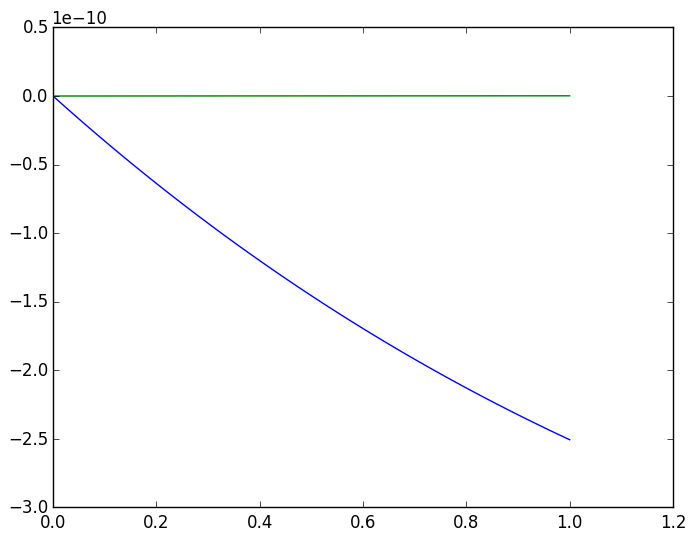

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f44ba76efd0>

In [70]:
plot(T_rk3, X_rk3 - exp(-0.3*T_rk3))
plot(T_rk4, X_rk4 - exp(-0.3*T_rk4))

In [71]:
function harmonic(x,t)
    return [x[2], -x[1]]
end

harmonic (generic function with 1 method)

In [72]:
function euler(func, x0, dt, n)
    X = Array(Float64,(length(x0),n))
    T = linspace(0, (n-1)*dt, n)
    X[:,1] = x0
    for i= 2:n
        X[:,i] = X[:,i-1] + func(X[:,i-1], T[i-1])*dt
    end
    return T, X
end        

euler (generic function with 1 method)

In [73]:
euler(harmonic, [1.0, 0.0], 0.01, 1001)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],
2x1001 Array{Float64,2}:
 1.0   1.0    0.9999   0.9997    …  -0.893445  -0.887907  -0.88228 
 0.0  -0.01  -0.02    -0.029999      0.553805   0.562739   0.571618)

In [74]:
function rk2(func, x0, dt, n)
    X = Array(Float64,(length(x0), n))
    T = linspace(0, (n-1)*dt, n)
    X[:,1] = x0
    for i = 2:n
        k1 = func(X[:,i-1], T[i-1])
        k2 = func(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt)
        X[:,i] = X[:,i-1] + dt*k2
    end
    return T, X
end

rk2 (generic function with 1 method)

In [75]:
function rk2_with_derivs(func, jacobian, x0, dt, n)
    X = Array(Float64,(length(x0), n))
    T = linspace(0, (n-1)*dt, n)
    deriv = eye(length(x0))
    X[:,1] = x0
    for i = 2:n
        k1 = func(X[:,i-1], T[i-1])
        k2 = func(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt)
        X[:,i] = X[:,i-1] + dt*k2
        deriv *= (eye(length(x0)) + 0.5*dt*jacobian(X[:,i-1], T[i-1]))
        deriv *= (eye(length(x0)) + 0.5*dt*jacobian(X[:,i-1] + 0.5*dt*k1, T[i-1] + 0.5*dt))
    end
    return T, X, deriv
end

rk2_with_derivs (generic function with 1 method)

In [76]:
rk2(harmonic, [1.0, 0.0], 0.01, 1001)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],
2x1001 Array{Float64,2}:
 1.0   0.99995   0.9998     0.99955   …  -0.849697  -0.844382  -0.838982
 0.0  -0.01     -0.019999  -0.029996      0.527274   0.535745   0.544162)

In [77]:
function ten_seconds_later(initial_velocity)
    _, X, derivs = rk2_with_derivs(harmonic, jacobian, [1.0, initial_velocity], 0.01, 1001)
    return X[1,end], derivs[1,2]
end

ten_seconds_later (generic function with 1 method)

In [78]:
function newton(function_and_derivative, initial_guess, tol)
    x = initial_guess
    f_of_x, df_of_x = function_and_derivative(initial_guess)
    while norm(f_of_x) > tol
        x -= df_of_x\f_of_x
        f_of_x, df_of_x = function_and_derivative(x)
    end
    return x
end

newton (generic function with 1 method)

In [79]:
v_init = newton(ten_seconds_later, 0.0, 1e-10)

-1.5417880658286134

In [80]:
T, X, _ = rk2_with_derivs(harmonic, jacobian, [1.0, v_init], 0.01, 1001)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],
2x1001 Array{Float64,2}:
  1.0       0.984532   0.968966  …  -0.036752  -0.0183769  -4.21227e-12
 -1.54179  -1.55171   -1.56148       1.83733    1.8376      1.83769    ,

2x2 Array{Float64,2}:
 -0.860359  -0.557721
  0.557721  -0.860359)

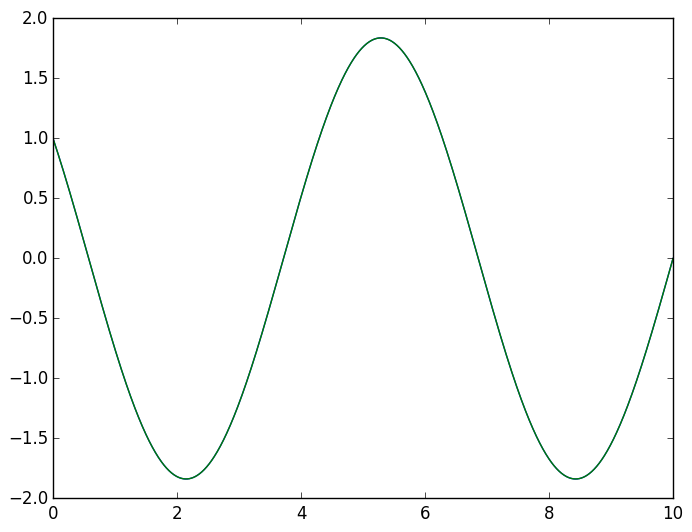

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f44ba61ff50>

In [81]:
plot(T, X[1,:][:])
plot(T, cos(T) + v_init*sin(T))

In [82]:
function euler_with_derivs(func, jacobian, x0, dt, n)
    X = Array(Float64,(length(x0),n))
    T = linspace(0, (n-1)*dt, n)
    derivs = eye(length(x0))
    X[:,1] = x0
    for i= 2:n
        derivs *= (eye(length(x0)) + jacobian(X[:,i-1], T[i-1])*dt)
        X[:,i] = X[:,i-1] + func(X[:,i-1], T[i-1])*dt
    end
    return T, X, derivs
end

euler_with_derivs (generic function with 1 method)

In [83]:
euler_with_derivs(harmonic, jacobian, [1.0, 0.0], 0.01, 1001)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],
2x1001 Array{Float64,2}:
 1.0   1.0    0.9999   0.9997    …  -0.893445  -0.887907  -0.88228 
 0.0  -0.01  -0.02    -0.029999      0.553805   0.562739   0.571618,

2x2 Array{Float64,2}:
 -0.88228   -0.571618
  0.571618  -0.88228 )

In [84]:
euler(harmonic, [1.0, 0.0], 0.01, 101)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0],
2x101 Array{Float64,2}:
 1.0   1.0    0.9999   0.9997    …   0.559786   0.55144    0.543039
 0.0  -0.01  -0.02    -0.029999     -0.834558  -0.840156  -0.845671)

In [85]:
function jacobian(x,t)
    return [0 1; -1 0]
end

jacobian (generic function with 1 method)

In [86]:
function euler_with_derivs(func, jacobian, x0, dt, n)
    X = Array(typeof(x0),(length(x0),n))
    T = zeros(n)
    #derivs = eye(length(x0))
    X[:,1] = x0
    
    for i= 2:n
        T[i] = T[i-1] + dt
        X[:,i] = X[:,i-1] + func(X[:,i-1], (i-1)*dt)*dt
        #derivs *= (eye(length(x0)) + jacobian(X[:,i-1], (i-1)*dt))
    end
    return T, X, derivs
end

euler_with_derivs (generic function with 1 method)

In [87]:
euler_with_derivs(harmonic, jacobian, [1.0, 0.0], 0.01, 101)

LoadError: `convert` has no method matching convert(::Type{Array{Float64,1}}, ::Float64)
while loading In[87], in expression starting on line 1

In [88]:
A = eye(2)

2x2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [89]:
A[:,1] = [0.5, 0.5]

2-element Array{Float64,1}:
 0.5
 0.5

In [90]:
A

2x2 Array{Float64,2}:
 0.5  0.0
 0.5  1.0